# Background tests 


## Imports 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFilter
from matplotlib.cbook import get_sample_data
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

## Plotting with custom image background 

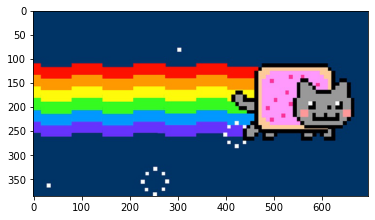

In [5]:
img = plt.imread("../backgrounds/nyan0.jpg")
fig, ax = plt.subplots()
ax.imshow(img)

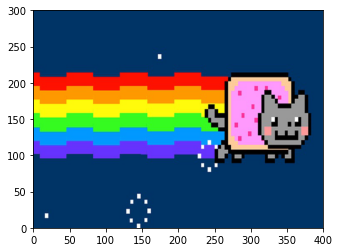

In [6]:
img = plt.imread("../backgrounds/nyan0.jpg")
fig, ax = plt.subplots()
ax.imshow(img, extent=[0, 400, 0, 300]) # change plotting dimensions 

### Changing transparency 

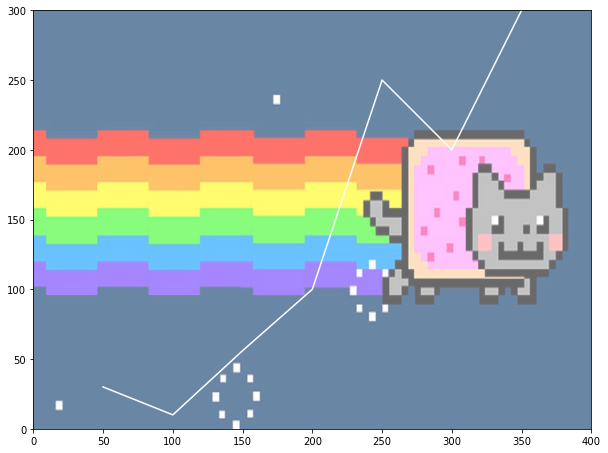

In [7]:
im_rgb = Image.open("../backgrounds/nyan0.jpg")
im_rgb.putalpha(150) # make more transparent 
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(im_rgb, extent=[0, 400, 0, 300]) # change plotting dimensions 
X = [50,100,150,200,250,300,350] 
y = [30,10,56,100,250,200,300] 
plt.plot(X,y, color="white") 

## Plotting cats instead of points 

In [8]:
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

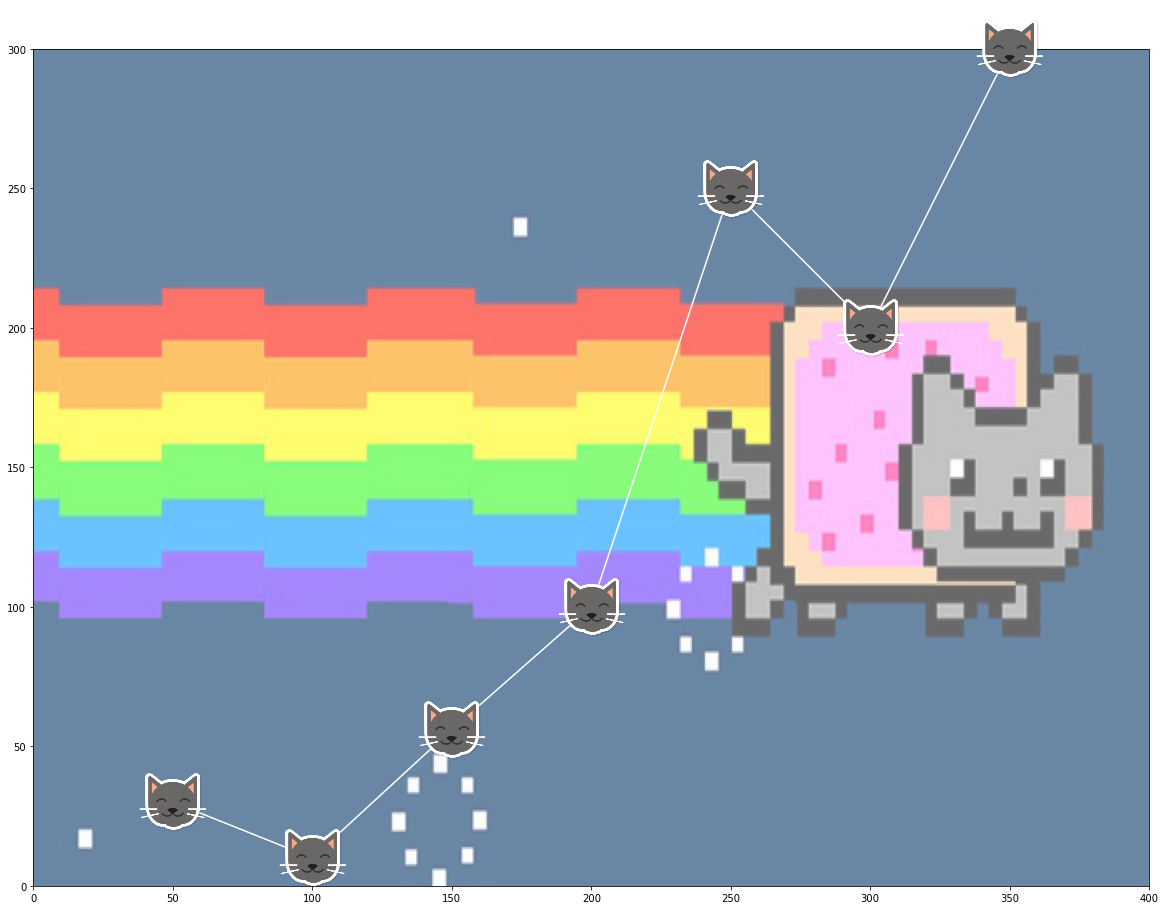

In [9]:
# background
im_rgb = Image.open("../backgrounds/nyan0.jpg")
im_rgb.putalpha(150) # make more transparent 

# points 
icon = "../icons/cat_icon0.png"

# initialize plot 
fig, ax = plt.subplots(figsize=(20,20))

# plot background 
ax.imshow(im_rgb, extent=[0, 400, 0, 300]) # change plotting dimensions 

# get data 
X = [50,100,150,200,250,300,350] 
y = [30,10,56,100,250,200,300] 

# plot actual scatter plot 
imscatter(X, y, icon, ax=ax, zoom=0.3)

# display 
plt.plot(X,y, color="white") 

# save 
plt.savefig("../img/catterplot_beta.jpg")
plt.show() 